In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import time
import random

np.random.seed(1001) 
random.seed(1001)

# Problem description
section 4.2 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution

In [4]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [ ]:
ob.add_extra_methods_to_problem(prob)

In [5]:
max_iter = 50
start_time = time.time()
best_params = (1, 0.5, 0.1, 10)
x_agent, x_global = prob.solve_doubly_stabilized(ds_params=best_params, rel_gap=10**(-5), abs_gap=10**(-5),\
                                                  max_iter=max_iter, memory=max_iter, tol=1e-6, print_freq=10)
print(f"elapsed time = {time.time() - start_time}")

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=223.021469758155, L=-840063.2757961305, U=-3749.923061852199, L0=-840063.2757961305
   null step: tau_k=0.5000005, mu_k=1.0000000000035325, L_k=-840063.2757961305, l_k=-421906.5994289914
k=10, rel_gap=0.041693391940443233, L=-4399.237219480989, U=-4223.159380214736, L0=-4399.237219480989
   null step: tau_k=0.000977561523459097, mu_k=1.0000000000333795, L_k=-4566.635320381768, l_k=-4309.028365256494
k=20, rel_gap=0.02824472923932411, L=-4362.4984962923145, U=-4242.665556398823, L0=-4362.4984962923145
   null step: tau_k=0.00013586811469686757, mu_k=7.056110490391541, L_k=-4566.635320381768, l_k=-4285.600048919702
k=30, rel_gap=0.021917896609201567, L=-4346.624909854115, U=-4253.399342820529, L0=-4346.624909854115
   null step: tau_k=0.0009989727349049848, mu_k=1.8143069558123535, L_k=-4566.635320381768, l_k=-4274.866589080968
k=40, rel_gap=0.019464219292204148, L=-4339.573455983719, U=-4256.719729699398, L0=-4339.573455983719
   null step: tau_k=0.00018647141256758606, mu_

In [6]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-4334.360502827317, -4260.732226157338)

# Centralized solution

In [8]:
h_cvx, x_cvx = ob.cvx_resource_allocation(params=params, R=R)

In [9]:
h_cvx, prob.upper_bnd[-1]

(-4278.68493859097, -4260.732226157338)

In [10]:
assert prob.lower_bnd[-1] - 1e-8 <= h_cvx <= 1e-8 + prob.upper_bnd[-1], print(prob.lower_bnd[-1], h_cvx, prob.upper_bnd[-1])

# Plot

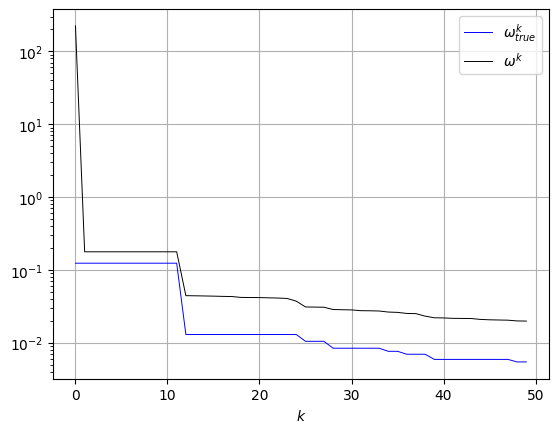

In [13]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd[:51], uk = prob.upper_bnd[:51], h_true = h_cvx, file_name='ra_doubly_stab.pdf')

i=28, omega_k=0.028589719383001172, omega_true=0.008418330096538565


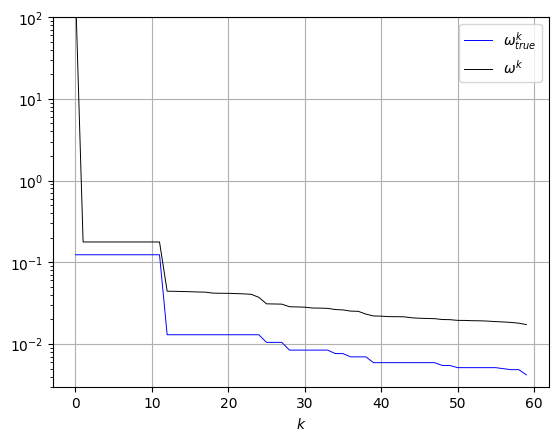

In [15]:
ob.plot_true_rel_gap_uk(y_min=3e-3, y_max=1e2, lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='ra_dsbm_bounds.pdf')